<div>
    <div style='float:left; width:55%; overflow:hidden'>
        <br><br><br><br>
        <span style = "float:right;">
        <h2><strong><span style='color:#17202a'>Time Series Modeling 📈 - LSTM 💥🔥</span></strong></h2>
        <h4><b><span style="color:#273746"> Share Market Forecasting live data </span></b></h4> 
        <p><span style="color:#566573">By Piyush Mahajan</span></p>
        <br>
        <b></b>
    </div>
    <div style="float:rigth; width:40%; max-height:300px; overflow: hidden;">
        <img src = 'https://i.pinimg.com/originals/65/56/d1/6556d1f996900f1b315db64ae955d524.png' width = '500px' height='300px'>
    </div>
</div>

<a id='2'></a>
# <span id = 'Table of content'>Table of Content</span>

<a id="toc"></a>
- [1. Introduction](#1)
- [2. Table of Content](#2)
- [3. Imports](#3)
- [4. Importing and Creation of dataset](#4)


<a id="3"></a>
# <span><center style="background-color: #922b21; color:white;"><strong>Libraries 📚</strong></center></span>

In [119]:
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff


from plotly.subplots import make_subplots
from pandas_profiling import ProfileReport
from yahoofinancials import YahooFinancials
from sklearn.preprocessing import MinMaxScaler, StandardScaler


plt.rcParams['figure.figsize']=(15,8)
%matplotlib inline


In [2]:
red_palette = ['#470202','#5e0202','#750202','#8b0202',
'#9d0101','#ac0202','#ba0303','#ca0202','#da0303','#eb0202','#fd0505','#fa2727']

sns.color_palette(red_palette)

[(0.2784313725490196, 0.00784313725490196, 0.00784313725490196),
 (0.3686274509803922, 0.00784313725490196, 0.00784313725490196),
 (0.4588235294117647, 0.00784313725490196, 0.00784313725490196),
 (0.5450980392156862, 0.00784313725490196, 0.00784313725490196),
 (0.615686274509804, 0.00392156862745098, 0.00392156862745098),
 (0.6745098039215687, 0.00784313725490196, 0.00784313725490196),
 (0.7294117647058823, 0.011764705882352941, 0.011764705882352941),
 (0.792156862745098, 0.00784313725490196, 0.00784313725490196),
 (0.8549019607843137, 0.011764705882352941, 0.011764705882352941),
 (0.9215686274509803, 0.00784313725490196, 0.00784313725490196),
 (0.9921568627450981, 0.0196078431372549, 0.0196078431372549),
 (0.9803921568627451, 0.15294117647058825, 0.15294117647058825)]

In [3]:
a = sns.dark_palette(red_palette[-1], n_colors=12)
a

[(0.1897764851237823, 0.13402828367662906, 0.13400379197324536),
 (0.2610869182610221, 0.13573415243843714, 0.13571186979065275),
 (0.3323973513982619, 0.13744002120024523, 0.13741994760806014),
 (0.4037077845355016, 0.13914588996205332, 0.13912802542546754),
 (0.478118671287404, 0.14092592693089653, 0.1409103674958057),
 (0.5494291044246438, 0.14263179569270462, 0.1426184453132131),
 (0.6207395375618836, 0.14433766445451268, 0.1443265231306205),
 (0.6920499706991233, 0.14604353321632077, 0.1460346009480279),
 (0.7664608574510257, 0.14782357018516398, 0.14781694301836606),
 (0.8377712905882655, 0.14952943894697207, 0.14952502083577346),
 (0.9090817237255052, 0.15123530770878016, 0.15123309865318085),
 (0.9803921568627451, 0.15294117647058825, 0.15294117647058825)]

In [4]:
PATH = os.getcwd()
PATH

'h:\\Excelr\\Project\\Stock_Prediction\\Program'

In [5]:
CSV_PATH = 'H:\\Excelr\\Project\\Stock_Prediction\\csv_files\\'

<a id = '4'></a>
# <span><center style='background-color:#922b21; color:white'><strong>Importing dataset 📈📊</strong></center></span>

In [6]:
# tatamotors = yf.Ticker('TATAMOTORS.NS')
tatamotors_financials = YahooFinancials('TATAMOTORS.NS')

In [7]:
# tatamotors_financial=tatamotors_financials.get_historical_price_data(start_date='2021-11-01',
#     end_date = '2022-03-01', time_interval = 'weekly')
# tatamotors_financial = pd.DataFrame(tatamotors_financial['TATAMOTORS.NS']['prices'])

In [8]:
# tatamotors_2m = tatamotors.history('max', interval='2m', start= '2022-02-01')  # YYYY-MM-DD
# tatamotors_5year = tatamotors.history('max', interval='1d', start= '2021-11-01')

In [9]:
# str(datetime.datetime.now()-datetime.timedelta(days=60))

In [10]:
def Fetch_data(symbol, interval = '1d', data_of_years = 1):
    if interval in ['2m', '5m', '15m', '30m']:
        print('Sorry, but only 2 month data can be extracted for given interval')
        current_time = datetime.datetime.now()
        month_value = current_time.month - 2       
        """
        Following can be used to get 2 month previous date
        datetime.datetime.now()-datetime.timedelta(days=60)
        """
        starting_date = current_time.replace(month= month_value)
    else:
        year_value = datetime.datetime.now().year-data_of_years
        ending_date = datetime.datetime.now()
        starting_date = ending_date.replace(year=year_value)
    data = yf.Ticker(symbol)
    data = data.history(interval=interval, start= starting_date)
    return data

def save_to_csv(data, file_name, location = 'H:\Excelr\Project\Stock_Prediction\csv_files/'):
    file_name = location+file_name
    data.to_csv(file_name)

To save dataset

In [11]:
# t = Fetch_data('TATAMOTORS.NS', data_of_years= 5)
# save_to_csv(t, 'Tatamotors_5years.csv')
# t = Fetch_data('TATAMOTORS.NS', interval= '2m')
# save_to_csv(t, 'Tatamotors_2m.csv')
# t = Fetch_data('INFY.NS', data_of_years= 1)
# save_to_csv(t, 'Infosys_5years.csv')

In [12]:
# (t.index[1:]-t.index[:-1]).value_counts()

In [13]:
tatamotors_5year = pd.read_csv(os.path.join(CSV_PATH,'Tatamotors_5years.csv'))
tatamotors_2m = pd.read_csv(os.path.join(CSV_PATH+'Tatamotors_2m.csv'))

## <span><center style = 'background-color:#922b21; color:white' >Visualizing datasets</center></span>

In [14]:
# tatamotors_financial.head(5)

In [15]:
tatamotors_2m.head(10)

Datetime        Open        High         Low       Close  \
0  2022-01-20 09:15:00+05:30  519.950012  522.900024  518.299988  522.099976   
1  2022-01-20 09:17:00+05:30  522.150024  522.250000  520.250000  521.849976   
2  2022-01-20 09:19:00+05:30  521.750000  521.900024  518.150024  519.099976   
3  2022-01-20 09:21:00+05:30  519.250000  519.250000  517.000000  518.000000   
4  2022-01-20 09:23:00+05:30  518.000000  518.599976  517.650024  518.450012   
5  2022-01-20 09:25:00+05:30  518.450012  519.000000  517.799988  518.900024   
6  2022-01-20 09:27:00+05:30  518.599976  519.750000  518.200012  519.549988   
7  2022-01-20 09:29:00+05:30  519.599976  521.750000  519.349976  521.599976   
8  2022-01-20 09:31:00+05:30  521.700012  521.799988  521.049988  521.400024   
9  2022-01-20 09:33:00+05:30  521.349976  521.650024  521.000000  521.650024   

   Volume  Dividends  Stock Splits  
0  281714          0             0  
1  332337          0             0  
2  465151          0             0  
3  420753          0             0  
4  198417          0             0  
5  171080          0             0  
6  135341          0             0  
7  216447          0             0  
8  192900          0             0  
9  122506          0             0

In [16]:
tatamotors_5year.head()

Date        Open        High         Low       Close   Volume  \
0  2017-03-08  469.399994  469.600006  461.149994  462.799988  5351597   
1  2017-03-09  462.450012  469.700012  462.000000  467.600006  3837624   
2  2017-03-10  471.000000  471.850006  465.100006  469.100006  5766815   
3  2017-03-14  481.000000  483.000000  468.450012  469.750000  6348198   
4  2017-03-15  475.000000  476.549988  470.649994  473.450012  4801312   

   Dividends  Stock Splits  
0          0             0  
1          0             0  
2          0             0  
3          0             0  
4          0             0

# <span><center style="background-color:#922b21; color:white"><strong>Exploring Dataset and Visualization </strong> </center></span>

## <span style = "color:blue;">Changing Format of dataset</span>

- We have dataset of stock prices of TATAMOTORS, in which we have to change indexes to datetime that is setting Date Column as index

### Changing format of 1 year dataset

In [17]:
tatamotors_5year.Date[1]

'2017-03-09'

In [18]:
# tatamotors_5year['Date_1'] = tatamotors_5year.Date
tatamotors_5year['Date'] = pd.to_datetime(tatamotors_5year.Date)
tatamotors_5year['Index'] = tatamotors_5year.Date
tatamotors_5year=tatamotors_5year.set_index('Index')
# tatamotors_5year['Date']=tatamotors_5year.Date.astype('datetime64')

In [19]:
tatamotors_5year['Years'] = tatamotors_5year.Date.dt.year
tatamotors_5year['Months'] = tatamotors_5year.Date.dt.month
tatamotors_5year['Days'] = tatamotors_5year.Date.dt.day
tatamotors_5year['Day_name'] = tatamotors_5year.Date.dt.day_name()

In [20]:
tatamotors_5year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-03-08 to 2022-03-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1236 non-null   datetime64[ns]
 1   Open          1236 non-null   float64       
 2   High          1236 non-null   float64       
 3   Low           1236 non-null   float64       
 4   Close         1236 non-null   float64       
 5   Volume        1236 non-null   int64         
 6   Dividends     1236 non-null   int64         
 7   Stock Splits  1236 non-null   int64         
 8   Years         1236 non-null   int64         
 9   Months        1236 non-null   int64         
 10  Days          1236 non-null   int64         
 11  Day_name      1236 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 125.5+ KB


In [21]:
tatamotors_5year.head()

Date        Open        High         Low       Close  \
Index                                                                   
2017-03-08 2017-03-08  469.399994  469.600006  461.149994  462.799988   
2017-03-09 2017-03-09  462.450012  469.700012  462.000000  467.600006   
2017-03-10 2017-03-10  471.000000  471.850006  465.100006  469.100006   
2017-03-14 2017-03-14  481.000000  483.000000  468.450012  469.750000   
2017-03-15 2017-03-15  475.000000  476.549988  470.649994  473.450012   

             Volume  Dividends  Stock Splits  Years  Months  Days   Day_name  
Index                                                                         
2017-03-08  5351597          0             0   2017       3     8  Wednesday  
2017-03-09  3837624          0             0   2017       3     9   Thursday  
2017-03-10  5766815          0             0   2017       3    10     Friday  
2017-03-14  6348198          0             0   2017       3    14    Tuesday  
2017-03-15  4801312          0             0   2017       3    15  Wednesday

In [22]:
tatamotors_5year.groupby('Years').get_group(2021).High.max(axis = 0)

536.7000122070312

In [23]:
# removing all empty dates
# build complete timeline from start date to end date
dt_all = pd.date_range(start=tatamotors_5year.index[0],end=tatamotors_5year.index[-1])# retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(tatamotors_5year.index)]# define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]

In [24]:
print(f'The first 5 break days are {dt_breaks[:5]}')
print(f'\nTotal number of break days are {len(dt_breaks)}')

The first 5 break days are ['2017-03-11', '2017-03-12', '2017-03-13', '2017-03-18', '2017-03-19']

Total number of break days are 591


### Changing format of 2 min dataset

In [25]:
tatamotors_2m['Date'] = pd.to_datetime(tatamotors_2m.Datetime)
tatamotors_2m['Index'] = tatamotors_2m.Date
tatamotors_2m = tatamotors_2m.set_index('Index')
# tatamotors_2m['Date']=tatamotors_2m.Date.astype('datetime64')

In [26]:
tatamotors_2m['Hour']=tatamotors_2m.Date.dt.hour
tatamotors_2m['Day_name']=tatamotors_2m.Date.dt.day_name()

In [27]:
# removing all empty datesb
# build complete timeline from start date to end date
dt_all_hr = pd.date_range(start=tatamotors_2m.index[0],end=tatamotors_2m.index[-1])# retrieve the dates that ARE in the original datset
dt_obs_hr = [d.strftime("%Y-%m-%d %H:%M:%S") for d in pd.to_datetime(tatamotors_2m.index)]# define dates with missing values
dt_breaks_hr = [d for d in dt_all_hr.strftime("%Y-%m-%d %H:%M:%S").tolist() if not d in dt_obs_hr]

In [28]:
print(f'The first 5 break days are {dt_breaks_hr[:5]}')
print(f'\nTotal number of break days are {len(dt_breaks_hr)}')

The first 5 break days are ['2022-01-22 09:15:00', '2022-01-23 09:15:00', '2022-01-26 09:15:00', '2022-01-29 09:15:00', '2022-01-30 09:15:00']

Total number of break days are 16


## <span style = 'color:blue'> Line and Candle plots </span>

### Line plot day wise

In [29]:
fig = go.Figure([go.Scatter(x= tatamotors_5year.index, y = tatamotors_5year['High'])])
fig.update_layout(hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks)])
fig.show()

### Candle plot day wise

In [30]:
# Plot with all gaps
fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
# fig.update_xaxes(rangebreaks = [dict(bounds = ['sat', 'mon'])])

fig.show()

In [31]:
fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(bounds = ['sat', 'mon'])])

fig.show()

In [32]:
# Day map without any gap

fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks)])


fig.show()

### OHLC plot day wise

In [33]:
ohlc = go.Figure(data = [go.Ohlc(x = tatamotors_5year.index, 
                open = tatamotors_5year[('Open')],
                high = tatamotors_5year[('High')],
                low = tatamotors_5year[('Low')],
                close = tatamotors_5year[('Close')])])

ohlc.update_xaxes(title_text = 'Time', rangeslider_visible = True,
    rangebreaks = [dict(values = dt_breaks)])
ohlc.show()

In [34]:
# # To check the gaps between time series
(tatamotors_5year.index[1:]-tatamotors_5year.index[:-1]).value_counts().head()

1 days    938
3 days    227
2 days     37
4 days     32
5 days      1
Name: Index, dtype: int64

In [35]:
# tatamotors_5year = tatamotors_5year.reindex(range(tatamotors_5year.index[0],tatamotors_5year.index[-1]+1,1),mday_mapod='pad')

### Candle plot minute wise

In [36]:
fig = go.Figure(data = [go.Candlestick(x = tatamotors_2m.index, 
                open = tatamotors_2m['Open'],
                high = tatamotors_2m['High'],
                low = tatamotors_2m['Low'],
                close = tatamotors_2m['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(pattern='hour', bounds=[15.5,9.5]), 
        dict(bounds = ['sat', 'mon'])])
# fig.update_xaxes(rangebreaks = [dict(bounds=['sat','mon'])])

fig.show()

In [37]:
# hr map without any break
fig = go.Figure(data = [go.Candlestick(x = tatamotors_2m.index, 
                open = tatamotors_2m['Open'],
                high = tatamotors_2m['High'],
                low = tatamotors_2m['Low'],
                close = tatamotors_2m['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks_hr), dict(pattern='hour', bounds=[15.5, 9.24])])
# fig.update_xaxes(rangebreaks = [dict(bounds=['sat','mon'])])

fig.show()

In [38]:
tatamotors_5year.head(1)

Date        Open        High         Low       Close  \
Index                                                                   
2017-03-08 2017-03-08  469.399994  469.600006  461.149994  462.799988   

             Volume  Dividends  Stock Splits  Years  Months  Days   Day_name  
Index                                                                         
2017-03-08  5351597          0             0   2017       3     8  Wednesday

## <span style = "color:blue"> Volume plot </span>

### day wise

In [39]:
area = px.area(data_frame= tatamotors_5year, 
    x = tatamotors_5year.index,
    y = 'Volume', markers= True,
     hover_data= ['High', 'Low'])
area.update_traces(line_color = 'Blue')
area.show()

### Minute wise dataset

In [64]:
area = px.area(data_frame= tatamotors_2m, 
    x = tatamotors_2m.index,
    y = 'Volume', markers= True,
     hover_data= ['High', 'Low'])
area.update_traces(line_color = 'Blue')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks_hr), dict(pattern='hour', bounds=[15.5, 9.24])])
area.show()

## <span style = "color:blue"> Combination of Candle plot & Volume plot </span>

In [69]:
def Combo_candle_volume_plot(data,day_gap=None, height = 800, width = 1000, slider = False):
    fig = make_subplots(rows= 2, cols= 1)

    fig.append_trace(go.Candlestick(x = data.index, 
                    open = data['Open'],
                    high = data['High'],
                    low = data['Low'],
                    close = data['Close']), row = 1, col = 1)

    fig.update_xaxes(rangebreaks = [dict(values = day_gap)])
    fig.append_trace(go.Scatter(x = data.index, 
            y = data.Volume, fill='tozeroy'), row = 2, col = 1)

    
    fig.update_layout(xaxis_rangeslider_visible = slider, hovermode = 'x unified')
    fig.update_layout(height = height, width = width)
    fig.show()

In [70]:
Combo_candle_volume_plot(tatamotors_5year, dt_breaks)

In [115]:
# Plotting one day candle and volume plots
data_for_date = '04-03-2022'
date = datetime.datetime.strptime(data_for_date, '%d-%m-%Y').date()
Combo_candle_volume_plot(tatamotors_2m.loc[tatamotors_2m.Date.dt.date == date,:],)

## <span style = "color:blue" >Box Plots</span>

<AxesSubplot:xlabel='Months', ylabel='High'>

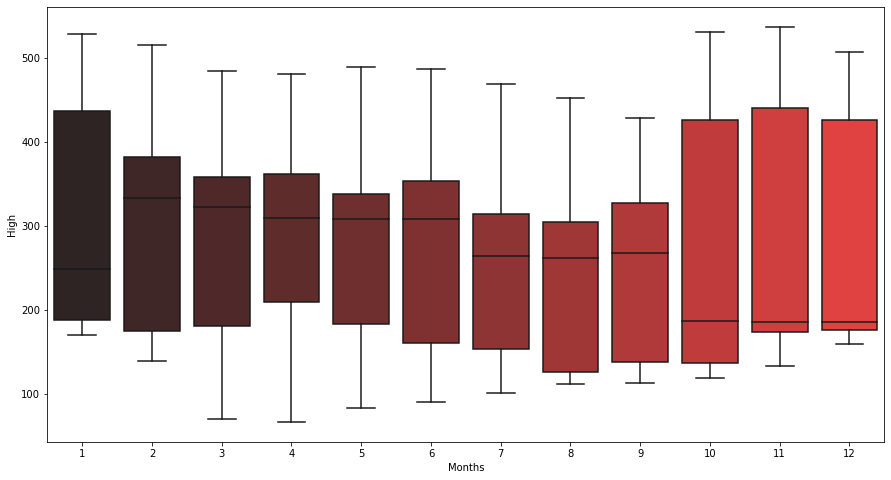

In [45]:
plt.figure(figsize= (15,8))
sns.boxplot(x = tatamotors_5year.Months, y = tatamotors_5year.High, palette= a)

In [46]:
px.box(x = tatamotors_5year.Months, 
    y = tatamotors_5year.High)

In [47]:
px.box(x = tatamotors_5year.Day_name, y = tatamotors_5year.High)

## Histogram for Distribution on values

In [48]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = tatamotors_5year.Open, name='Open'))
fig.add_trace(go.Histogram(x = tatamotors_5year.Low, name='Low'))
fig.add_trace(go.Histogram(x = tatamotors_5year.High, name= 'High'))

fig.show()

In [49]:
px.histogram(x = tatamotors_5year.Open)

## Moving average line plot

In [50]:
tatamotors_5year['Moving_avg_2'] = tatamotors_5year.High.rolling(2).mean()
tatamotors_5year['Moving_avg_5'] = tatamotors_5year.High.rolling(5).mean()
tatamotors_5year['Moving_avg_10'] = tatamotors_5year.High.rolling(10).mean()

In [51]:
fig = px.line(data_frame=tatamotors_5year.iloc[:100,:], 
        x = tatamotors_5year.index[:100],
        y = ['High', 'Moving_avg_2', 'Moving_avg_5', 'Moving_avg_10'])
fig.update_layout(hovermode = 'x unified')

# Manipulating dataset

## Differencing dataset with period of 1 day

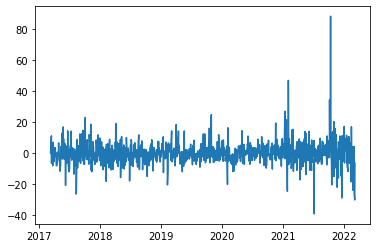

In [52]:
plt.plot(tatamotors_5year.High.diff(1))

In [53]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = tatamotors_5year.index, y = tatamotors_5year['High'].pct_change(1)))
# fig.add_trace(go.Line())
fig.show()

# <span><center style="background-color:#922b21;color:white"><strong>Dataset Creation </strong></center></span>

In [54]:
tatamotors_5year.head(5)

Date        Open        High         Low       Close  \
Index                                                                   
2017-03-08 2017-03-08  469.399994  469.600006  461.149994  462.799988   
2017-03-09 2017-03-09  462.450012  469.700012  462.000000  467.600006   
2017-03-10 2017-03-10  471.000000  471.850006  465.100006  469.100006   
2017-03-14 2017-03-14  481.000000  483.000000  468.450012  469.750000   
2017-03-15 2017-03-15  475.000000  476.549988  470.649994  473.450012   

             Volume  Dividends  Stock Splits  Years  Months  Days   Day_name  \
Index                                                                          
2017-03-08  5351597          0             0   2017       3     8  Wednesday   
2017-03-09  3837624          0             0   2017       3     9   Thursday   
2017-03-10  5766815          0             0   2017       3    10     Friday   
2017-03-14  6348198          0             0   2017       3    14    Tuesday   
2017-03-15  4801312          0             0   2017       3    15  Wednesday   

            Moving_avg_2  Moving_avg_5  Moving_avg_10  
Index                                                  
2017-03-08           NaN           NaN            NaN  
2017-03-09    469.650009           NaN            NaN  
2017-03-10    470.775009           NaN            NaN  
2017-03-14    477.425003           NaN            NaN  
2017-03-15    479.774994    474.140002            NaN

In [55]:
tatamotors_5year['Mean']=np.mean(tatamotors_5year.iloc[:,1:5], axis = 1)

In [56]:
tatamotors_2m['Mean'] = np.mean(tatamotors_2m.iloc[:,1:5], axis = 1)

In [57]:
# To create dataset for LSTM
def Time_series_dataset(data_column, time_steps):
    dataset = []
    target = []
    for i in range(data_column.shape[0]-time_steps-1):
        a = data_column[i:time_steps+i].to_list()
        target_value = data_column[time_steps+i]
        target.append(target_value)
        dataset.append(a)
    df = pd.DataFrame(dataset)
    df['Target'] = target
    return df

## Mean Value Dataset

### Day wise dataset

In [58]:
mean_value_dataset = Time_series_dataset(tatamotors_5year.Mean, 50)
mean_value_dataset.shape

(1185, 51)

In [59]:
mean_value_dataset.head(5)

0           1           2           3           4           5  \
0  465.737495  465.437508  469.262505  475.550003  473.912498  479.450005   
1  465.437508  469.262505  475.550003  473.912498  479.450005  478.437508   
2  469.262505  475.550003  473.912498  479.450005  478.437508  475.375000   
3  475.550003  473.912498  479.450005  478.437508  475.375000  475.112495   
4  473.912498  479.450005  478.437508  475.375000  475.112495  464.575005   

            6           7           8           9  ...          41  \
0  478.437508  475.375000  475.112495  464.575005  ...  429.274994   
1  475.375000  475.112495  464.575005  468.124992  ...  430.337502   
2  475.112495  464.575005  468.124992  470.874992  ...  430.437500   
3  464.575005  468.124992  470.874992  466.250000  ...  432.500000   
4  468.124992  470.874992  466.250000  470.099998  ...  435.312500   

           42          43          44          45          46          47  \
0  430.337502  430.437500  432.500000  435.312500  443.300003  441.162506   
1  430.437500  432.500000  435.312500  443.300003  441.162506  440.475006   
2  432.500000  435.312500  443.300003  441.162506  440.475006  447.750000   
3  435.312500  443.300003  441.162506  440.475006  447.750000  450.675003   
4  443.300003  441.162506  440.475006  447.750000  450.675003  467.750000   

           48          49      Target  
0  440.475006  447.750000  450.675003  
1  447.750000  450.675003  467.750000  
2  450.675003  467.750000  472.425003  
3  467.750000  472.425003  479.237503  
4  472.425003  479.237503  480.199997  

[5 rows x 51 columns]

### Minute wise dataset

In [60]:
mean_value_dataset_minute = Time_series_dataset(tatamotors_2m.Mean, 50)

In [61]:
mean_value_dataset_minute.head(5)

0           1           2           3           4           5  \
0  520.812500  521.625000  520.225006  518.375000  518.175003  518.537506   
1  521.625000  520.225006  518.375000  518.175003  518.537506  519.024994   
2  520.225006  518.375000  518.175003  518.537506  519.024994  520.574982   
3  518.375000  518.175003  518.537506  519.024994  520.574982  521.487503   
4  518.175003  518.537506  519.024994  520.574982  521.487503  521.412506   

            6           7           8           9  ...          41  \
0  519.024994  520.574982  521.487503  521.412506  ...  518.949997   
1  520.574982  521.487503  521.412506  521.237518  ...  518.712509   
2  521.487503  521.412506  521.237518  521.962494  ...  518.162506   
3  521.412506  521.237518  521.962494  522.712494  ...  517.437485   
4  521.237518  521.962494  522.712494  522.350006  ...  517.475006   

           42          43          44          45          46          47  \
0  518.712509  518.162506  517.437485  517.475006  517.650009  518.000000   
1  518.162506  517.437485  517.475006  517.650009  518.000000  518.350006   
2  517.437485  517.475006  517.650009  518.000000  518.350006  518.300003   
3  517.475006  517.650009  518.000000  518.350006  518.300003  517.950012   
4  517.650009  518.000000  518.350006  518.300003  517.950012  517.799988   

           48          49      Target  
0  518.350006  518.300003  517.950012  
1  518.300003  517.950012  517.799988  
2  517.950012  517.799988  517.574997  
3  517.799988  517.574997  517.675018  
4  517.574997  517.675018  518.087509  

[5 rows x 51 columns]

## Volume dataset

### Day wise

In [62]:
volume_dataset = Time_series_dataset(tatamotors_5year.Volume, 50)

In [63]:
volume_dataset.head(5)

0        1        2        3        4        5        6        7  \
0  5351597  3837624  5766815  6348198  4801312  6272947  6338248  2871104   
1  3837624  5766815  6348198  4801312  6272947  6338248  2871104  4685410   
2  5766815  6348198  4801312  6272947  6338248  2871104  4685410  4695648   
3  6348198  4801312  6272947  6338248  2871104  4685410  4695648  8665384   
4  4801312  6272947  6338248  2871104  4685410  4695648  8665384  4296510   

         8        9  ...       41       42       43       44       45  \
0  4685410  4695648  ...  5378402  4049649  3850940  1885702  3452072   
1  4695648  8665384  ...  4049649  3850940  1885702  3452072  6572678   
2  8665384  4296510  ...  3850940  1885702  3452072  6572678  6158546   
3  4296510  4417413  ...  1885702  3452072  6572678  6158546  4387481   
4  4417413  2982614  ...  3452072  6572678  6158546  4387481  6145914   

         46        47        48        49    Target  
0   6572678   6158546   4387481   6145914  10330814  
1   6158546   4387481   6145914  10330814  27370795  
2   4387481   6145914  10330814  27370795  15108872  
3   6145914  10330814  27370795  15108872   7692869  
4  10330814  27370795  15108872   7692869   4253044  

[5 rows x 51 columns]

### Minute wise volume

In [117]:
volume_dataset_min = Time_series_dataset(tatamotors_2m.Volume, 50)
volume_dataset_min.shape

(5948, 51)

In [118]:
volume_dataset_min.head(5)

0       1       2       3       4       5       6       7       8  \
0  281714  332337  465151  420753  198417  171080  135341  216447  192900   
1  332337  465151  420753  198417  171080  135341  216447  192900  122506   
2  465151  420753  198417  171080  135341  216447  192900  122506  114352   
3  420753  198417  171080  135341  216447  192900  122506  114352  241149   
4  198417  171080  135341  216447  192900  122506  114352  241149  330262   

        9  ...      41      42      43      44      45     46     47     48  \
0  122506  ...   83557   42109  230514  157878  127469  50698  46505  36770   
1  114352  ...   42109  230514  157878  127469   50698  46505  36770  43598   
2  241149  ...  230514  157878  127469   50698   46505  36770  43598  36757   
3  330262  ...  157878  127469   50698   46505   36770  43598  36757  36267   
4  109249  ...  127469   50698   46505   36770   43598  36757  36267  39741   

      49  Target  
0  43598   36757  
1  36757   36267  
2  36267   39741  
3  39741   23024  
4  23024   59187  

[5 rows x 51 columns]

# Feature engineering

In [126]:
X_train = mean_value_dataset.iloc[:500,:].to_numpy()

In [133]:
day_scaler = MinMaxScaler().fit(X_train)
# day_scaler = day_scaler.fit(X_train)

In [134]:
day_scaler.transform(X_train)

array([[0.94879993, 0.9478971 , 0.95940864, ..., 0.87277107, 0.89466556,
        0.90346852],
       [0.9478971 , 0.95940864, 0.97833121, ..., 0.89466556, 0.90346852,
        0.95485667],
       [0.95940864, 0.97833121, 0.97340305, ..., 0.90346852, 0.95485667,
        0.96892635],
       ...,
       [0.10296442, 0.09747196, 0.08972237, ..., 0.09329623, 0.09389814,
        0.08249945],
       [0.09747196, 0.08972237, 0.08825521, ..., 0.09389814, 0.08249945,
        0.077007  ],
       [0.08972237, 0.08825521, 0.09446242, ..., 0.08249945, 0.077007  ,
        0.07249268]])